In [1]:
## Loading samples, store data in dataframe


In [1]:
import pandas as pd
%run data_prep.ipynb

('top_xl_7', 'antitop_xl_7', 'cosTheta1r_7', 'cosTheta2r_7', 'rmin0_7', 'rmin1_7', 'sT_met_7', 'MT2r_7', 'weight_7', 'channel_7', 'MCTruth_MP_7', 'MCTruth_WP_7')
('top_xl_7', 'antitop_xl_7', 'cosTheta1r_7', 'cosTheta2r_7', 'rmin0_7', 'rmin1_7', 'sT_met_7', 'MT2r_7', 'weight_7', 'channel_7', 'MCTruth_MP_7', 'MCTruth_WP_7')


<type 'tuple'>


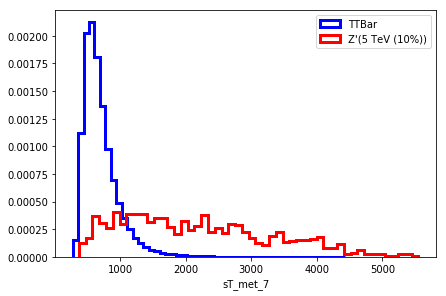

In [2]:
seed = 1234
np.random.seed(seed)

df = {}
print (type(features))
VARS = [ 'sT_met_7']
for k in filename.keys():
    df[k] = pd.DataFrame(params[k],columns=VARS)
    df[k] = pd.DataFrame(params[k],columns=VARS)
    df[k] = df[k][df[k]['sT_met_7'] >=0]

df[('bkg','mm')]['label'] = np.zeros(len(df[('bkg','mm')]))
df[('sig','mm')]['label'] = np.ones(len(df[('sig','mm')]))

    
#print(sorted(df.keys()))    
#print (df[('sig','mm')].iloc[-10:])
#print (df[('bkg','mm')].iloc[-10:])

plt.figure(figsize=(15,10))
ax = plt.subplot(2, 2, 1)
sns.distplot(df[('bkg','mm')][:][VARS[0]], norm_hist=True, kde=False,
             label="TTBar", bins = 50,
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "blue"})
sns.distplot(df[('sig','mm')][:][VARS[0]], norm_hist=True, kde=False,
             label="Z'(5 TeV (10%))", bins = 50,
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "red"})
ax.legend(loc="upper right")
plt.show()

In [3]:
## DNN architecture 


Using TensorFlow backend.


1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


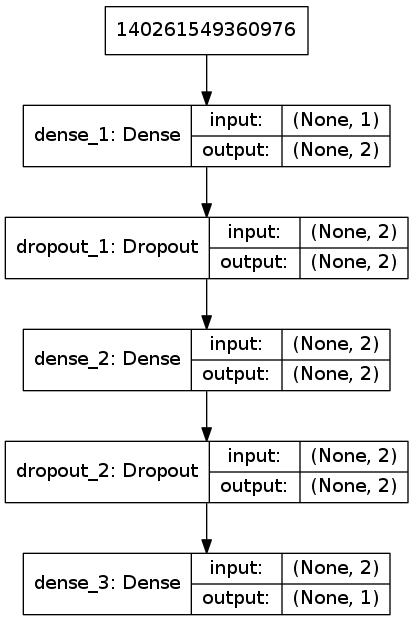

In [3]:
# baseline keras model
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.layers import Input, Activation, Dense, Convolution2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from IPython.display import Image


NDIM = len(VARS)
print(NDIM)
model = Sequential()
# Number of parameters: for Dense layer: each neuron has one bias parameter and one weight per input: 
# N = n_neurons * ( n_inputs + 1).
# Input - Layer
model.add(Dense(NDIM*2, activation = "relu", input_shape=(NDIM, )))
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Dense(NDIM*2, activation = "relu"))
model.add(Dropout(0.2, noise_shape=None, seed=None)) 
model.add(Dense(1, activation = "sigmoid"))


# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# print the model summary
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_plot.png')

In [16]:
#for layer in model.layers:
#    print(layer[0].shape, '\n-------------------\n')


In [4]:
from sklearn.model_selection import train_test_split

df_sampled_bkg = df[('bkg','mm')].sample(n=df[('sig','mm')].shape[0], random_state=1)
df_all = pd.DataFrame([])
df_all = pd.concat([df[('sig','mm')],df_sampled_bkg])
print df[('sig','mm')].shape
print df_sampled_bkg.shape
print df_all.shape

(1139, 2)
(1139, 2)
(2278, 2)


In [5]:
X = df_all.iloc[:,0:len(VARS)] #Predictors
Y = df_all.iloc[:,len(VARS)]   #Outcomes

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
print type(X_test)
print type(X)
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[0]/float(X_train.shape[0]+X_test.shape[0]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(1822, 1)
(456, 1)
0.799824407375


sT_met_7    1477.322314
dtype: float64
sT_met_7    1418.197308
dtype: float64
sT_met_7    1430.032691
dtype: float64


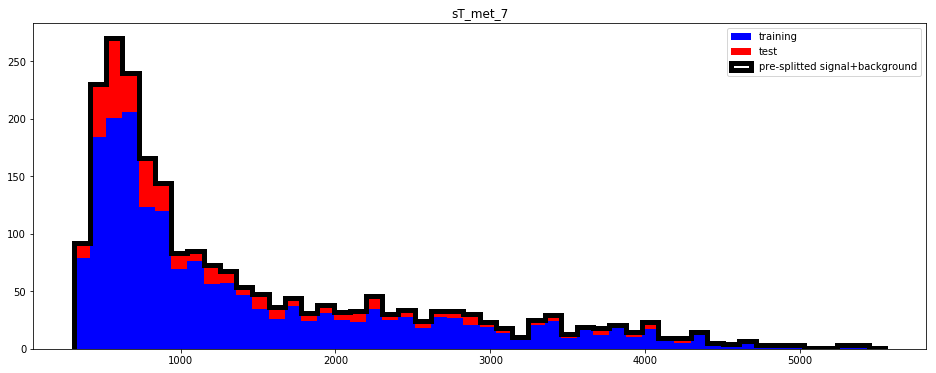

In [7]:
print X_test.mean(axis=0) 
print X_train.mean(axis=0) 
print X.mean(axis=0) 
plt.figure(figsize=(16, 6))
ax = plt.subplot(1, 1, 1)
bins=np.histogram(np.hstack((X_test[VARS[0]],X_train[VARS[0]])), bins=50)[1] #get the bin edgesplt.hist(X_train[VARS[0]], bins=50,label='trained sample')
sample = {'training': 'blue', 'test': 'red'}
plt.hist([X_train[VARS[0]], X_test[VARS[0]]], bins, stacked=True,
          color = [sample['training'], sample['test']], label=['training', 'test'])
plt.hist(X[VARS[0]], bins, histtype='step',edgecolor='black', linewidth=5, facecolor='none',label='pre-splitted signal+background')
ax.legend(loc="upper right")
plt.title(VARS[0])
plt.show()

[1418.19730787]
[2.33987729e-16]
[0.05437077]
[0.0108837]


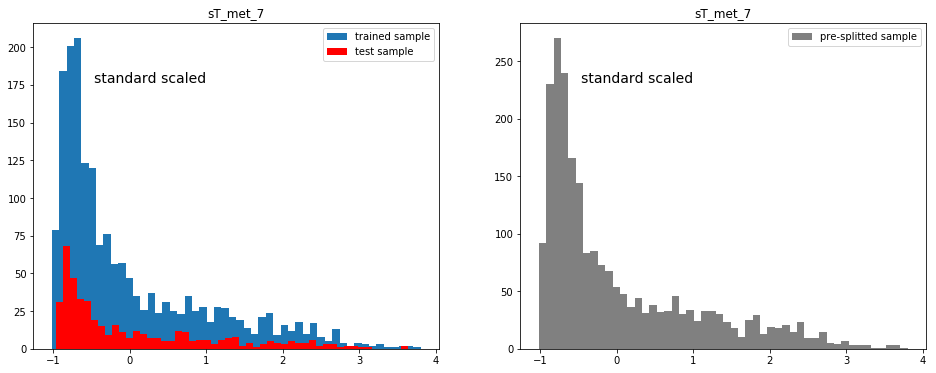

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.externals.joblib import dump, load

#X_train2 = X_train

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(scaler.mean_)

from sklearn.externals import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

scaler_total = joblib.load(scaler_filename) 
X = scaler_total.transform(X)

print X_train.mean(axis=0) 
print X_test.mean(axis=0) 
print X.mean(axis=0) 



plt.figure(figsize=(16, 6))
ax = plt.subplot(1, 2, 1)
plt.hist(X_train, bins=50,label='trained sample')
plt.hist(X_test, bins=50,color='red',label='test sample')
plt.title(VARS[0])
ax.text(0.15, 0.85, 'standard scaled', transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
ax.legend(loc="upper right")
ax = plt.subplot(1, 2, 2)
plt.hist(X, bins=50,color='grey',label='pre-splitted sample')
ax.legend(loc="upper right")
plt.title(VARS[0])
ax.text(0.15, 0.85, 'standard scaled', transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
plt.show()


In [9]:

# early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# model checkpoint callback
# this saves our model architecture + parameters into dense_model.h5
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('dense_model.h5', monitor='val_loss', 
                                   verbose=0, save_best_only=True, 
                                   save_weights_only=False, mode='auto', 
                                   period=1)

In [10]:
# Train classifier
history = model.fit(X_train, 
                    Y_train, 
                    epochs=100, 
                    batch_size=1024, 
                    verbose=0, # switch to 1 for more verbosity 
                    callbacks=[early_stopping, model_checkpoint], 
                    validation_split=0.25)

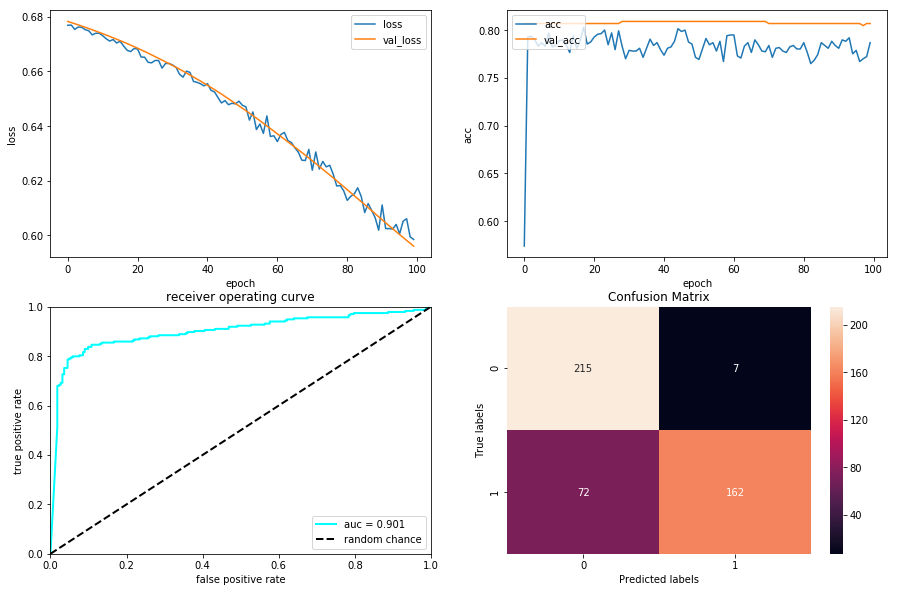

[[215   7]
 [ 72 162]]


'\n# Example of a confusion matrix in Python\nfrom sklearn.metrics import confusion_matrix\n \nexpected = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]\npredicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]\nresults = confusion_matrix(expected, predicted)\nprint(results)\n\n[[4 2]\n[1 3]]\n'

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# plot loss vs epoch
plt.figure(figsize=(15,10))
ax = plt.subplot(2, 2, 1)
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

# plot accuracy vs epoch
ax = plt.subplot(2, 2, 2)
ax.plot(history.history['acc'], label='acc')
ax.plot(history.history['val_acc'], label='val_acc')
ax.legend(loc="upper left")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

# Plot ROC
Y_predict = model.predict(X_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
roc_auc = auc(fpr, tpr)
ax = plt.subplot(2, 2, 3)
ax.plot(fpr, tpr, lw=2, color='cyan', label='auc = %.3f' % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.set_title('receiver operating curve')
ax.legend(loc="lower right")

matrix = confusion_matrix(Y_test, Y_predict.round())

ax = plt.subplot(2, 2, 4)
sns.heatmap(matrix, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix for test sample'); 
plt.show()
print matrix

'''
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix
 
expected = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
predicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]
results = confusion_matrix(expected, predicted)
print(results)

[[4 2]
[1 3]]
'''

# evaluate the model
#model.evaluate(X_test, Y_test, verbose=0)



In [15]:
df_all['dense'] = model.predict(X) # add prediction to array
df_all['predicted_outcome'] = np.zeros(len(df_all))
plt.figure(figsize=(16, 6))
print type(Y_predict)


#print df_all.iloc[:50]
#print df_all.iloc[-50:]


for i, row in df_all.iterrows():
    if row['dense']<0.5:
        df_all.set_value(i,'predicted_outcome',0)
    else:
        df_all.set_value(i,'predicted_outcome',1)
        
print df_all.iloc[:10]
print df_all.iloc[-10:]

<type 'numpy.ndarray'>


/usr/local/bin/start_ipykernel.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/bin/start_ipykernel.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


      sT_met_7  label     dense  predicted_outcome
0  2316.286166    1.0  0.547477                1.0
1  1956.018132    1.0  0.544567                1.0
2   562.565070    1.0  0.358166                0.0
3  3954.330911    1.0  0.547477                1.0
4  3032.797487    1.0  0.547477                1.0
5  2807.648483    1.0  0.547477                1.0
6  1812.714501    1.0  0.536870                1.0
7   646.982392    1.0  0.370927                0.0
8  2647.544402    1.0  0.547477                1.0
9  3961.112808    1.0  0.547477                1.0
           sT_met_7  label     dense  predicted_outcome
24284    673.802770    0.0  0.375020                0.0
190500   797.746236    0.0  0.394161                0.0
89073    505.740387    0.0  0.349687                0.0
29519    914.825807    0.0  0.412547                0.0
123615  1002.812588    0.0  0.426529                0.0
202359   731.225778    0.0  0.383844                0.0
231997   591.387605    0.0  0.362502           

<Figure size 1152x432 with 0 Axes>

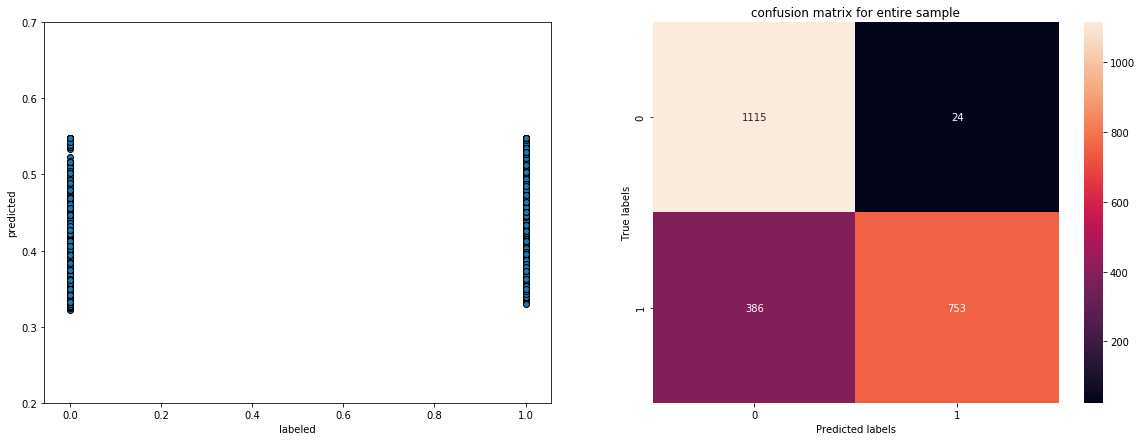

[[215   7]
 [ 72 162]]


In [57]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(20,7))
ax = plt.subplot(1, 2, 1)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax.scatter(df_all['label'],df_all['dense'],  cmap=cm_bright, edgecolors='k')
ax.set_xlabel('labeled')
ax.set_ylabel('predicted')
ax.set_ylim(0.2,0.7)


all_matrix = confusion_matrix(df_all['label'], df_all['dense'].round())
ax = plt.subplot(1, 2, 2)
sns.heatmap(all_matrix, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix for entire sample'); 
plt.show()
print matrix

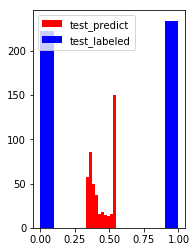

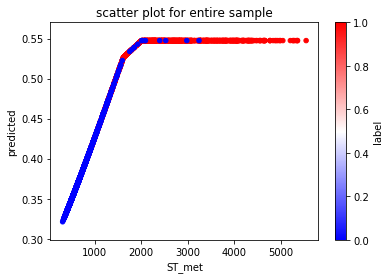

In [35]:
from matplotlib import cm


#Y_predict = model.predict(X_test)
#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
ax = plt.subplot(1, 2, 1)
ax.hist(Y_predict, lw=2, color='red', label='test_predict')
ax.hist(Y_test, lw=2, color='blue', label='test_labeled')
ax.legend(loc="upper left")
plt.show()

bkg_predict = model.predict(X_test)
fig, ax = plt.subplots()
df_all.plot(kind='scatter', x=VARS[0], y='dense', c='label', cmap = cm.bwr,ax=ax);
ax.set_xlabel('ST_met')
ax.set_ylabel('predicted')
ax.set_title('scatter plot for entire sample'); 
plt.show()



In [36]:
print type(X_train)
print df[('sig','mm')]['sT_met_7'].shape
print type(df_sampled_bkg['sT_met_7'].values)



signal_st = df[('sig','mm')]['sT_met_7'].ravel().reshape(-1, 1)
bkg_st = df[('bkg','mm')]['sT_met_7'].ravel().reshape(-1, 1)



<type 'numpy.ndarray'>
(1139,)
<type 'numpy.ndarray'>


In [37]:
# And now to load...

scaler_test = joblib.load(scaler_filename) 
signal_st = scaler_test.transform(signal_st)


In [38]:
scaler_test2 = joblib.load(scaler_filename) 
bkg_st = scaler_test2.transform(bkg_st)



/cvmfs/sft.cern.ch/lcg/views/LCG_95a/x86_64-centos7-gcc7-opt/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/cvmfs/sft.cern.ch/lcg/views/LCG_95a/x86_64-centos7-gcc7-opt/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


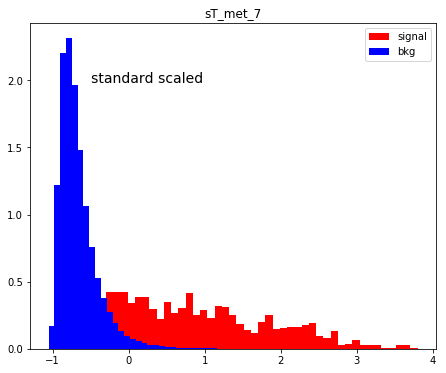

In [39]:
plt.figure(figsize=(16, 6))
ax = plt.subplot(1, 2, 1)
plt.hist(signal_st, bins=50,label='signal',color='red',normed=1)
plt.hist(bkg_st, bins=50,color='blue',label='bkg',normed=1)
plt.title(VARS[0])
ax.text(0.15, 0.85, 'standard scaled', transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
ax.legend(loc="upper right")

In [40]:
print signal_st.mean(axis=0) 
print bkg_st.mean(axis=0) 


[0.67643495]
[-0.66081455]


In [41]:
df[('bkg','mm')]['totalbkg_predict'] = model.predict(bkg_st)
df[('sig','mm')]['totalsig_predict']= model.predict(signal_st)

/cvmfs/sft.cern.ch/lcg/views/LCG_95a/x86_64-centos7-gcc7-opt/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/cvmfs/sft.cern.ch/lcg/views/LCG_95a/x86_64-centos7-gcc7-opt/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


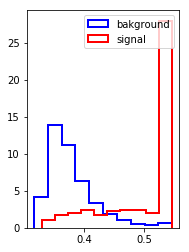

In [42]:
ax = plt.subplot(1, 2, 1)
ax.hist(df[('bkg','mm')]['totalbkg_predict'], lw=2, color='blue', label='bakground',normed=1,histtype= "step")
ax.hist(df[('sig','mm')]['totalsig_predict'], lw=2, color='red', label='signal',normed=1,histtype= "step")
ax.legend(loc="upper right")

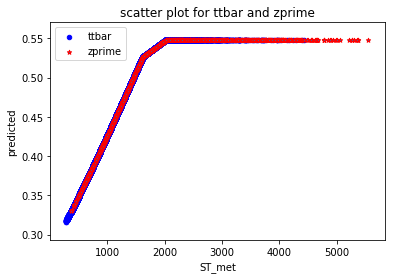

In [59]:
#df[('bkg','mm')].plot(kind='scatter', x=VARS[0], y='totalbkg_predict',
#                      color='DarkBlue', label='bkg');
#df[('sig','mm')].plot(kind='scatter', x=VARS[0], y='totalsig_predict',
#                      color='red', label='sig');


#plt.scatter(df[('bkg','mm')].sT_met_7, df[('bkg','mm')].totalbkg_predict,
#            color='DarkBlue', label='bkg',facecolors='none')
#plt.scatter(df[('sig','mm')][:1000][VARS[0]], df[('sig','mm')][:1000]['totalsig_predict'],
#            color='red', label='sig',facecolors='none')

##plt.scatter(df[('bkg','mm')].sT_met_7,df[('bkg','mm')].totalbkg_predict)
#df.plot(x="x",y="b", color="r", label="b vs. x", ax=ax)
#df.plot( x="x",y="c", color="g", label="c vs. x", ax=ax)

#print df[('bkg','mm')]
fig, ax = plt.subplots()
df[('bkg','mm')].plot(kind='scatter', x=VARS[0], y='totalbkg_predict',ax=ax,color='blue',
                      label='ttbar');
df[('sig','mm')].plot(kind='scatter', x=VARS[0], y='totalsig_predict',ax=ax,
                      facecolor='none',edgecolor='red',marker="*", label='zprime');

ax.set_xlabel('ST_met')
ax.set_ylabel('predicted')
ax.set_title('scatter plot for ttbar and zprime'); 
plt.legend(loc='upper left')
plt.show()
